In [34]:
#Import the Dataset.
import pandas as pd
import numpy as np

In [35]:
data=pd.read_csv(r"C:\Users\shriv\OneDrive\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [36]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Now we will discuss the problem statement.


The dataset contains the data of the customer on the basis of the data we have to predict the total charges by the customer . The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents''tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges',and 'Churn'.





In the above dataset the target is to predict the 'total charges' paid by the customer.






Churn rate (Sometimes called attrition rate), in its broadest sense ,is a measure of the number of indviduals or items moving out of collective group over a specific period .it is one of two primary factors that determine the steady state level of customers a business will support the term is used in many contexts , but is most widely applied in business with respect to a contractual customer base . For example in business with a subscriber based service mobel such as mobile telephone network and pay TV operator . The term is also used to refer to participant turnover in peer to peer networks .Churn rate is an input into customer lifetime value modeling lifetime value modeling an can be part of a simulator used to measure return on marketing investiment using marketing mix modeling.
     

# Checking Nan Values

In [37]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#  Checking the datatype of the columns


In [38]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can observe that the "Total Charges" has continuous data it is an object type .Let us handle this column.

In [39]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [40]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
data['TotalCharges'].nunique()#Number of unique values in total charges column

6531

In [42]:
data.shape[0]

7043

In [43]:
data.loc[data['TotalCharges']==" "]#loc method is use to access to use the group of data.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After Some observation . We saw the some columns have spaces as the value

In [44]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)

In [45]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Converting the column type from object to float.

In [46]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [47]:
data.TotalCharges.dtypes

dtype('float64')

Now , We can see TotalCharges columns has some Space values which is replaced by nan values . Now we we will handle the nan values .





Handling the nan value and replacng it with mean of the column . As the column is Continious in nature

In [48]:
np.mean(data['TotalCharges'])

2283.3004408418697

In [49]:
data.iloc[6670,:]#iloc method is used to access the row and column on the basis of index value.

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [50]:
data['TotalCharges']=data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

In [51]:
data.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

In [52]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Making DataFrame for the Nominal Data. (Selection Categorical Column) 

In [53]:
df_visualization_nominal=data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

In [54]:
df_visualization_nominal

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Month-to-month,Yes,Mailed check,Yes


# Visualization of the Data.


For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns .

In [55]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


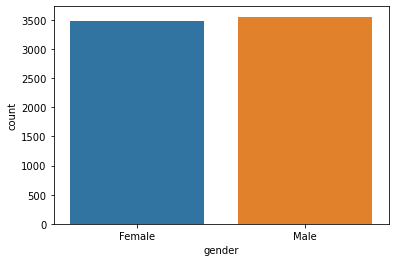

In [56]:
ax=sns.countplot(x='gender',data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

From the above observation the total number of male is 3555 and total number of female customer is 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


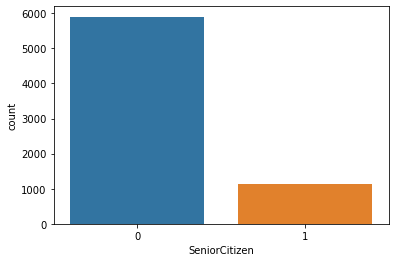

In [57]:
ax=sns.countplot(x='SeniorCitizen',data=df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

From the above observation the total numver of younger customer is 5901 and the total number of senior citizen customer is 1142

No     3641
Yes    3402
Name: Partner, dtype: int64


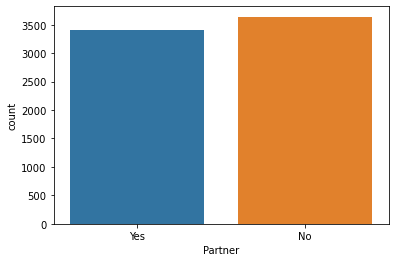

In [58]:
ax=sns.countplot(x='Partner',data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

From the above obseration the total number of married customer is 3402 and the total number of unmarried customer is 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


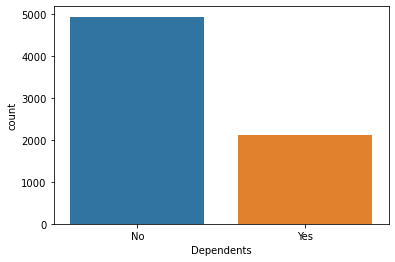

In [59]:
ax=sns.countplot(x='Dependents',data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

From the above observation the total number of dependent customer is 2110 and total number of independent customer is 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


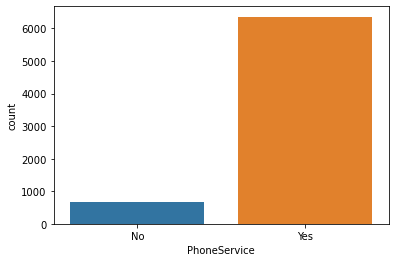

In [60]:
ax=sns.countplot(x='PhoneService',data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

From the aboce observation the total number customer using phone service is 6361 and total number of customer not using phone services is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


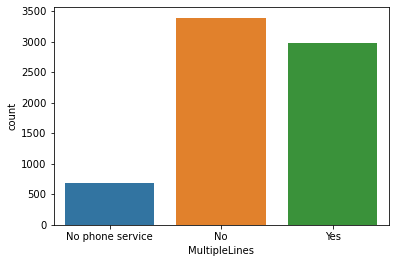

In [62]:
ax=sns.countplot(x='MultipleLines',data=df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

From the above observation number of customer not using any internet service is 3390. Fibre optics internet services is 2971 and using DSL internet service is 682

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


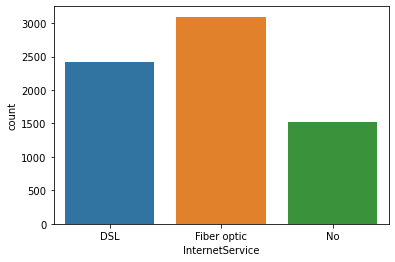

In [63]:
ax=sns.countplot(x='InternetService',data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

From the above observation the total number of customer not using any internet service is 1526.fibre optics internet service is 3096 and using DSL internet service is 2421

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


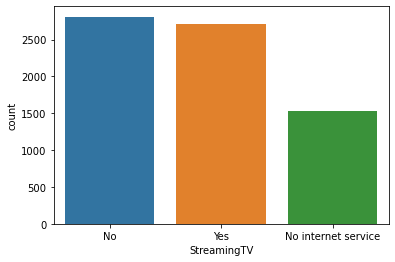

In [64]:
ax=sns.countplot(x='StreamingTV',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

From the above observation the total number of customer not using StreamingTV  is 2810.StreamingTV is using by 2707 and not using internet service is 1526

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


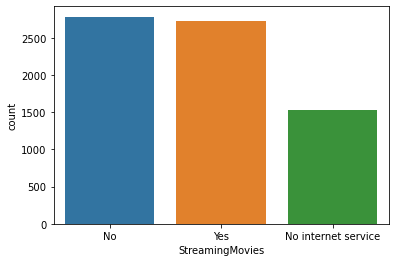

In [65]:
ax=sns.countplot(x='StreamingMovies',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

From the above observation the total number of customer not using StreamingMovies is 2785.StreamingTV is using by 2732 and not using internet service is 1526

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


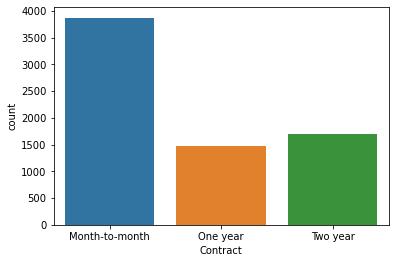

In [68]:
ax=sns.countplot(x='Contract',data=df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

From the above observation the total number of customer recharge month to month is 3875. For 2 year is using by 1695 and for One year 1473.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


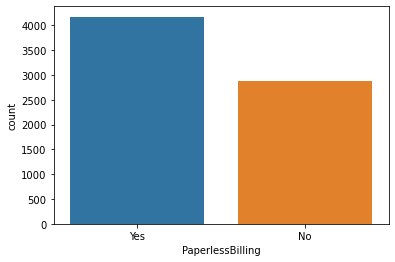

In [70]:
ax=sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

From the above observation the total number of customer use paperlessBilling is 4171. and Who are not using paperlessBilling is 2872.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


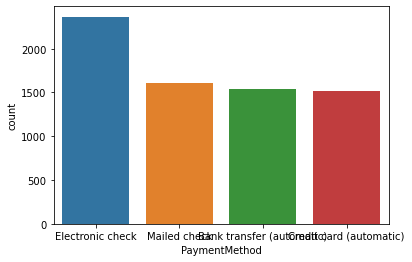

In [71]:
ax=sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

From the above observation 2365 People use Electronic check for payment. and 1612 people ued Mailed check for payment. 1544 people use Bank Transfer for payment . and 1522 people used credit card for paymenyt.

No     5174
Yes    1869
Name: Churn, dtype: int64


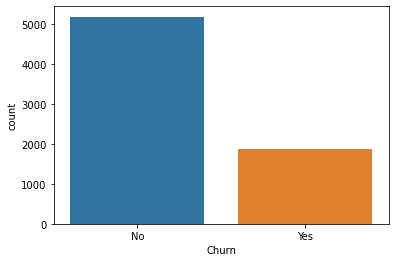

In [74]:
ax=sns.countplot(x='Churn',data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

from the above observation 5174 people is using churn and 1869 people is not using churn.

- For the ordianl category data we will use to line plot as it will give the flow of the line of the classes of the columns


- Making DataFrame of the Ordinal Data.

In [77]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
df_visualization_ordianl=data[['customerID','tenure']].copy()

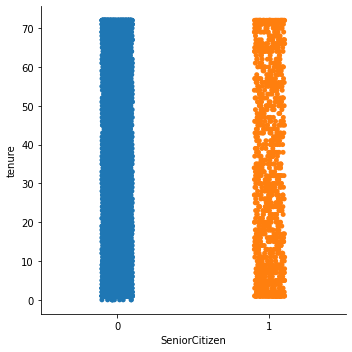

In [80]:
sns.catplot(x='SeniorCitizen',y='tenure',data=data)

Checking the distribution of the continuous value of the float type columns.

In [81]:
data_visualization_continuous=data[['MonthlyCharges','TotalCharges']].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

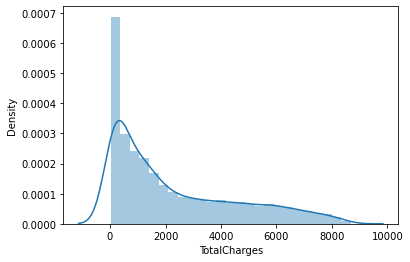

In [84]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data_visualization_continuous['TotalCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

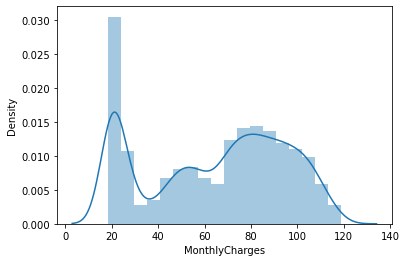

In [85]:
sns.distplot(data_visualization_continuous['MonthlyCharges'],kde=True)

# Visualization part is Completed




Since the dataset has a lot of string values . We will use the Encoding technique to convert the string data to numerical one.



# Encoding of DataFrame

In [87]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [91]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))
        

# Describe The Dataset

In [93]:
#Only continuous columns

In [95]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

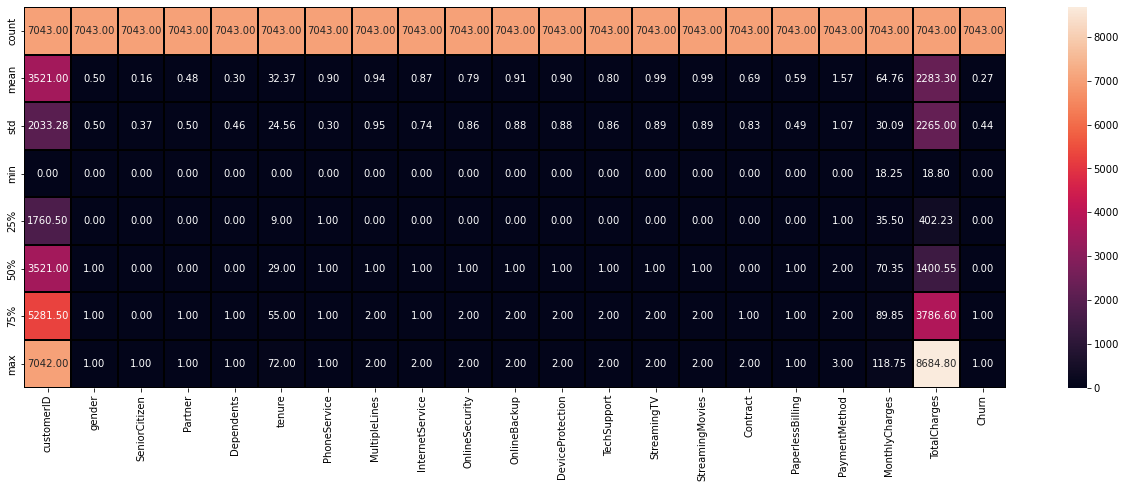

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

# Correlation of the columns with target columns.

In [98]:
data.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

Checking the column which are positively and negative correlated with the target columns


In [108]:
plt.figure(figsize=(22,7))
data.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges'].plot(kind='bar',color='c'))
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

AttributeError: 'Series' object has no attribute 'data'

<Figure size 1584x504 with 0 Axes>

<AxesSubplot:>

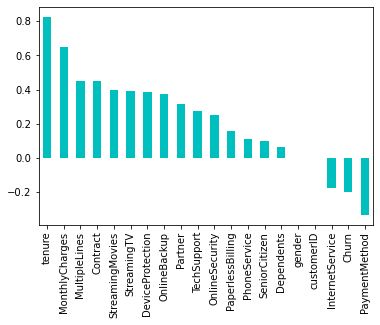

In [111]:
data.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')

In [110]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [112]:
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Keeping +/-0.5 as the range for skewness here are the columns which does not lie with in this range.


- Senior Citizen-Categorical
- Dependents - Cateorical
- Phone Service - Categorical
- Contract - Categorical
- Total Charges - Target Variables
- Churn - Categorical

- Since , no columns has skewness , we will not treat that

# Checking the Outliers on the int and float type of columns

<AxesSubplot:>

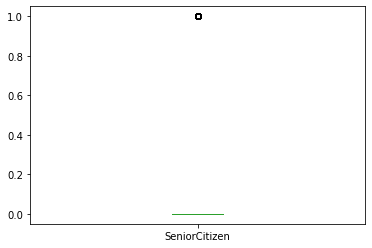

In [114]:
data['SeniorCitizen'].plot.box()

<AxesSubplot:>

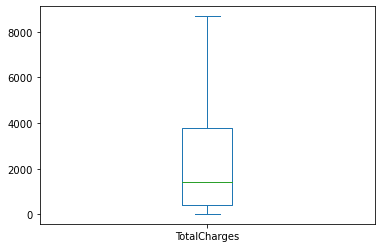

In [116]:
data['TotalCharges'].plot.box()

<AxesSubplot:>

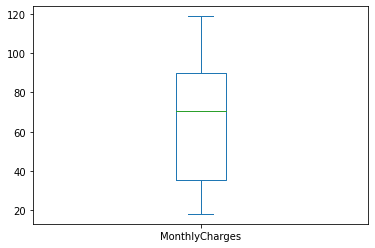

In [118]:
data['MonthlyCharges'].plot.box()

<AxesSubplot:>

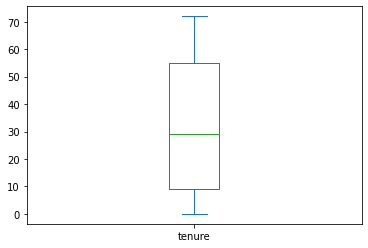

In [119]:
data['tenure'].plot.box()

In [120]:
data['SeniorCitizen'].unique()#Confirming here

array([0, 1], dtype=int64)

Since the column SeniorCitizen is nominal type , we cannot consider its data points as outlier.

#  Considering the Outlier remova

In [121]:
data.shape

(7043, 21)

In [125]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [127]:
df_new_z=data[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [128]:
df_new_z.shape

(6361, 21)

In [129]:
#Percentage loss of data

In [130]:
data_loss=((7043-636)/7043)*100

In [131]:
data_loss

90.96975720573619

Our data is becoming biased as it is not considering the case senior citizen. Thus , we will not remove outliers.

# Separating the columns into feature and target


In [133]:
feature=data.drop("TotalCharges",axis=1)
target=data['TotalCharges']

#  Scaling the data using MinMaxScaler

In [141]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [142]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9058706722803965
 At random state 0 , the testing accuracy is :- 0.8977317673785853


 At random state 1 , the testing accuracy is :- 0.9052277082152647
 At random state 1 , the testing accuracy is :- 0.9003132716690803


 At random state 2 , the testing accuracy is :- 0.9056858398935237
 At random state 2 , the testing accuracy is :- 0.8984735750686543


 At random state 3 , the testing accuracy is :- 0.9044956724241889
 At random state 3 , the testing accuracy is :- 0.9032713403489679


 At random state 4 , the testing accuracy is :- 0.9031354749784841
 At random state 4 , the testing accuracy is :- 0.9085937883962479


 At random state 5 , the testing accuracy is :- 0.9026338340566922
 At random state 5 , the testing accuracy is :- 0.9101290251842342


 At random state 6 , the testing accuracy is :- 0.9028087364691222
 At random state 6 , the testing accuracy is :- 0.9097783155230829


 At random state 7 , the testing accuracy is :- 

In [149]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=12)


In [150]:
#Train the model
lr.fit(x_train,y_train)

LinearRegression()

In [156]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9042173834952026


#  Cross Validation of the Model

In [161]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)

from sklearn.model_selection import cross_val_score

In [164]:
for j in range(2,10):
    cv_score=cross_val_score(lr,feature,target,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")

At cross fold 2 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 3 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 4 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 5 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 6 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 7 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 8 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534
At cross fold 9 the CV Score for training is -0.8911218980191142 and accuracy for testing is -0.934927259900534


Since the number of folds dont have such impact on the accuracy and cv_score . So cv=5 is selected.



Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

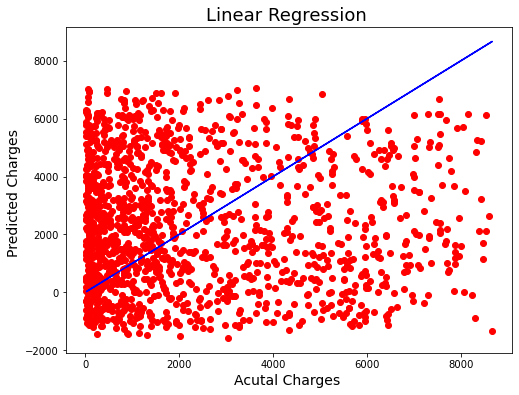

In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

Best Fit Line is Covering most of the datapoints which show good fit of our model.

# Regularization - 

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [169]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],
          'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [177]:
#Final Model accuracy
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

90.42835075238867

In [178]:
pred_ls=ls.predict(x_test)

In [179]:
lss=r2_score(y_test,pred_ls)
lss*100

90.42026267132482

In [181]:
cv_score=cross_val_score(ls,feature,target,cv=5)
cv_mean=cv_score.mean()
cv_mean * 100

90.36629382160928

# Ensemble Technique

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2']}



rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [188]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,feature,target,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

R2 Score 99.88481610702958
Cross Val Score 99.87347737041293


We are getting model accuracy and cross validatiion both as 99.8% which shows our model is performing extremly well.

In [189]:
import pickle
filename=('churn.pkl')
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [191]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.88481610702958


In [193]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],pred_decision[:]],index=['predicted','original'])

In [194]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633
predicted,1131.1680,8090.0255,4050.5900,428.3150,1225.7470,111.4955,2855.4715,35.5035,20.105,64.4910,...,769.7995,3922.353,141.382,1552.871,7543.31,4091.092,341.886,3424.4325,3106.7475,1676.1965
original,909.7805,3024.9290,1661.0755,1657.7175,3650.9265,65.7790,940.8110,504.1335,5423.829,187.4415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date-19-10-22
#Time - 21:12